# Intro to Scientific Computing

${\bf Problem \,Set\, 6}$

NAMES: Tyler, Raj, Takahito

DATE: 11/22/2107

# The Evolving Sun

In this problem, you'll explore some aspects of the stellar-evolution data we started looking at in class. 

You can access the data for the sun that we worked with in class from this link:
<url>https://www.dropbox.com/s/79ol2l88qobgx1x/0205080911.zip?dl=1</url>

Save it onto your computer and unzip the folder. Use the example from class where we read them in using <code>astropy.io.read()</code> to guide you in this homework.

In [16]:
#first import our packages
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
from glob import *
from astropy.io import ascii


# 1) Evolution of a star like our Sun

Read in the `trimmed_history.data` file, that contains global quantaties of the star over its simulated lifetime. 

* Make a plot with time on the x-axis, and a quantity of your choosing on the y-axis. 
    * label your plots axes, including units. 
    * Pick a linestyle and color that you like or that you think make sense for what you're trying to show.
    * **Do some reaserch on the subject**, and in a markdown cell below your plot, **write a detailed caption for your figure**.  Explain what you're plotting, and what your figure tells us about the sun's evolution. 
    
For those interested I recommend this book to read some more on the evolution of stars. I have used it for a couple undergraduate courses and I think is a great gateway to learn about the evolution of stars.

http://cruzcat.ucsc.edu/search~S5?/aprialnik/aprialnik/1%2C1%2C2%2CB/frameset&FF=aprialnik+dina&1%2C%2C2


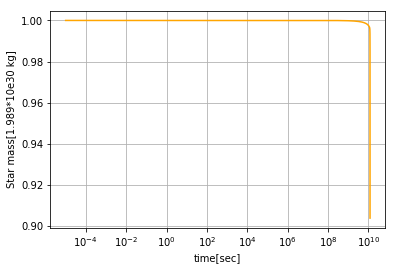

In [6]:
history = ascii.read('trimmed_history.data',header_start=4,data_start=5)
plot(history['star_age'],history['star_mass'],c = 'orange')
semilogx()
xlabel('time[sec]')
ylabel('Star mass[1.989*10e30 kg]')
grid()

This plot shows the stars mass as a function of it's age. This plot shows that the mass of the star is conserved throughout it's life cycle. Only as the star enters the end of it's life does it start losing mass. This is indictive of it's death in decoming either a dwarf star or going supernova. Either way the star loses the majority of it's mass a the end of it's life.

# 2) Internal structure from profiles

In this step, we'll ask you to read in some of the profile files and look at how the interior of the sun changes as it gets older. 

In class, we looped over profile files, read them in, then plotted each with a different color.   

- Start by constructing a similar loop to the one we made in class. **Focus on profile files 10-19**.  

Here, lets look at how the interior composition of the sun changes over time.

- **Try plotting the Hydrogen mass fraction**. (*Hint:* Look at MESAWEB's output documentation to find the right column name to plot!). 
    - Add legends to each line you plot according to the profile name.
    - Save your figure into a (pdf or png) file.


- **On top of the same plot, add the Helium mass fraction with a different line sytle (for example dashed or dotted)**. If you don't want it to appear in your legend, use the argument <code>label=''</code> when calling the function `plot()`.
    - Save your figure into a (pdf or png) file.


- In a markdown cell below your plots, **write a caption describing each of your two figures**, and what we can learn about the time-evolution of composition in the sun's interior from it. 



- **In a different cell and figure** make the same combined plot (H and He fraction) but now **Use profile files 22-27**. 

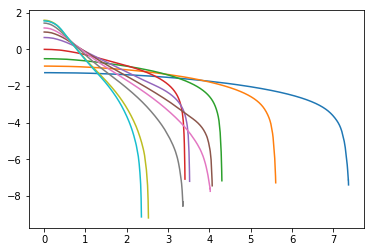

In [59]:
files = glob('profile1[0-9].data')
for fn in files:
    profile = ascii.read(fn,header_start=4,data_start=5)
    plot(profile['radius'],profile['logRho'])

    
#This is from the star data that we selected. Our star was 2.4 times the 
#Mass of the sun. Aldo said it was ok to use that fro these because
#we overwtrote out original histroy data with out new star data.

In [60]:
print profile.colnames[28]
print profile.colnames[29]

h1
he3


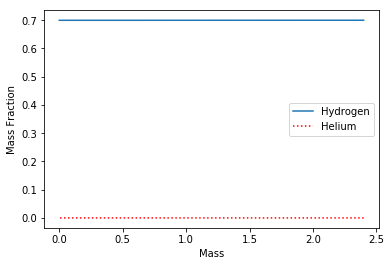

In [61]:
plot(profile['mass'],profile['h1'],label = 'Hydrogen')
legend(loc=0)
plot(profile['mass'],profile['he3'],label = 'Helium',linestyle=':',c = 'red')
legend(loc=0)
xlabel('Mass')
ylabel('Mass Fraction')

savefig("figure1".pdf)


In the first figure we have the radius of the star plotted against the density of the star. It shows that the star is most dense near the center and less dense near the surface.

In the second figure we see the mass fraction of two elements as a function of the cumulative mass of the star. This means we are seeing the percentage of the star that is hydrogen or helium as a function of the radius

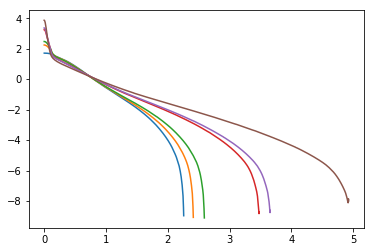

In [62]:
files = glob('profile2[2-7].data')
for fn in files:
    profile = ascii.read(fn,header_start=4,data_start=5)
    plot(profile['radius'],profile['logRho'])

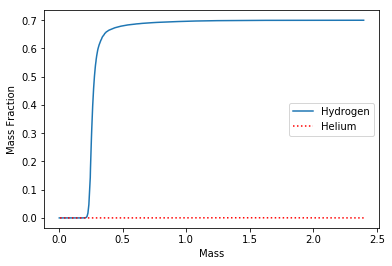

In [63]:
plot(profile['mass'],profile['h1'],label = 'Hydrogen')
legend(loc=0)
plot(profile['mass'],profile['he3'],label = 'Helium',linestyle=':',c = 'red')
legend(loc=0)
xlabel('Mass')
ylabel('Mass Fraction')

savefig("figure2".pdf)

# 2) Get your own star... 

Go to MESAWeb and fill in the request to run a model. Leave most of the parameters at their defaults, but choose a different mass, in the range 0.1 - 100 solar masses. 

http://mesa-web.asu.edu/index.html

**It can take a while (a few hours or a day or two if they're backed up) *SO PLAN THIS ONE AHEAD! * **

When you have your data:
* **remake an analagous history plot to the one you made in (#1)**. In other words, **plot the same quantities with your *new* dataset**.  

* In a markdown cell below your figure, **describe how your new result is similar to or different than the previous one where the star was 1 solar mass**. 



** If you don't receive the email with the stellar profiles in a day (or two) let me know and I can share a link to results from simulations of stars with 0.3, 2, 6, 10 or 30 solar masses**

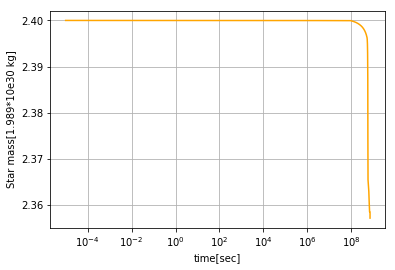

In [3]:
history = ascii.read('trimmed_history.data',header_start=4,data_start=5)
plot(history['star_age'],history['star_mass'],c = 'orange')
semilogx()
xlabel('time[sec]')
ylabel('Star mass[1.989*10e30 kg]')
grid()

# 3) The Hertzsprung Russel Diagram

a) Plot the solar mass model and your new star on a diagram that has $\log T_{\rm eff}$ (effective temperature) for the x-axis and  $\log(L)$ (Luminosity) for the y-axis. This is the Hertzsprung Russel Diagram we saw in class. **Use a scatter plot (as in the last homework) to assign a color to the points according to the logarithm of the age of the star** .

b) **In the same plot** use the equation:

$$
\log(L/L_{\odot}) = \log(4\pi\sigma R^2) + 4\log(T) - \log(L_{\odot})
$$

to **plot the logarithm of the luminosity $\log(L/L_{\odot})$ as a function of the logarithm of the temperature $\log(T)$ for 3 different values of $R$ ( $R = 1.0 R_{\odot}, \ 10 R_{\odot}$ and $100 R_{\odot}$)**, where $ R_{\odot}=6.96\times10^{10}$ cm and $L_{\odot} = 3.9\times10^{33}$ erg/s  are the radius and luminosity of the Sun respectively.



Read a little bit online about the Hertzsprung Russel or HR diagram and **comment in a markdown cell below your plot on the tracks your two models trace out in the HR diagram**. What are we seeing? How are they similar or different? Describe what you think is happening to the star as it evolves.  Is its radius changing? Where in the HR diagram does it spends most of its life?

*Note: In the HR diagram one usually flips the X-axis because that's how it's often plotted (for weird historical reasons) that isn't essential, though. *





In [64]:
sigma = 5.6704*10**-5
R = 6.955*10**10
Lsun = 3.9*10**33


In [65]:
X1 = log10(4*pi*sigma*R**2) + 4*history['log_Teff'] - log10(Lsun)
X2 = log10(4*pi*sigma*(10*R)**2) + 4*history['log_Teff'] - log10(Lsun)
X3 = log10(4*pi*sigma*(100*R)**2) + 4*history['log_Teff'] - log10(Lsun)

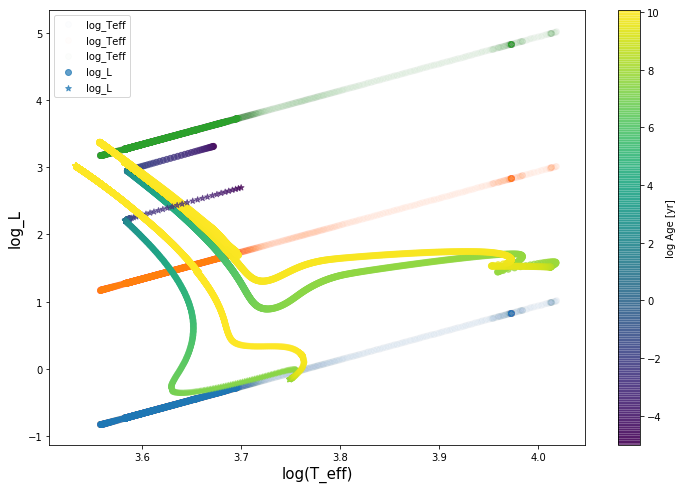

In [66]:
# Draw the HR diagram for both stars
history1 = ascii.read('trimmed_history1.data',header_start=4,data_start=5)

figure(figsize=(12,8))
#xlim(4,3.5)

scatter(history['log_Teff'],X1, alpha = 0.01)
scatter(history['log_Teff'],X2, alpha = 0.01)
scatter(history['log_Teff'],X3, alpha = 0.01)


scatter(history['log_Teff'],history['log_L'],marker='o',alpha=0.7,c = log10(history['star_age']))
scatter(history1['log_Teff'],history1['log_L'],marker='*',alpha=0.7,c = log10(history1['star_age']))
colorbar(label='log Age [yr]')
xlabel('log(T_eff)',fontsize=15)
ylabel('log_L',fontsize=15)
legend(loc=0)

we are seeing the evolution of two stars. The evolution path are a bit different because the initial masses of the stars were different. some of the differences would be spending different amount of time on the various stages of the evolution and also the time taken to reach the stages would be different. The star spends most of its life on the main sequence. The Radius does change as the star evolves. The radius keeps increasing as the star goes to its RGB phase and then it the radius contracts as the star moves on its evolution path. with the ultimate demise of the star as a supernova.(our star is 2.4 solar mass)  